# Sentiment Analysis of the Yelp Dataset
The notebook analyzes the Yelp dataset for sentiment analysis.This [dataset](https://www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset) contains 4,000+ unique reviews.

The notebook uses natural language processing techniques to preprocess the text data, including tokenization, word embeddings, and stopword removal. The preprocessed data is then used to train a machine learning model to predict the sentiment of each review. 

The notebook evaluates the performance of the model using metrics such as accuracy, precision, recall, and F1 score. 

In future, the notebook will provide insights and recommendations based on the analysis, including potential areas for improvement and future work.
 

## Getting our Data

In [1]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the csv file into a dataframe
df = pd.read_csv('yelp.csv')

# print the first 5 rows of the dataframe
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# Data Analysis

In [3]:
# get more information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In this code we are adding a new feature to the Yelp dataset called "text length". The feature is the length of the text in each review. 

The length of the text can be a useful feature for sentiment analysis because longer reviews may contain more information and provide more insight into the sentiment of the reviewer. 

By adding this new feature, the notebook can potentially improve the performance of the machine learning model by providing additional information about each review.

In [4]:
# feature extraction - get the length of the text
df['text length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [5]:
# describe the dataset
df.describe()

,stars,cool,useful,funny,text length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


## Data Visualization

In [9]:
# create a new dataframe with the numerical columns
df_class = df[['stars', 'text length', 'cool', 'useful', 'funny']]

# get the mean values of the numerical columns
stars = df_class.groupby('stars').mean()
stars

,text length,cool,useful,funny
stars,,,,
1,826.515354,0.576769,1.604806,1.056075
2,842.256742,0.719525,1.563107,0.875944
3,758.498289,0.788501,1.306639,0.694730
4,712.923142,0.954623,1.395916,0.670448
5,624.999101,0.944261,1.381780,0.608631


<Axes: >

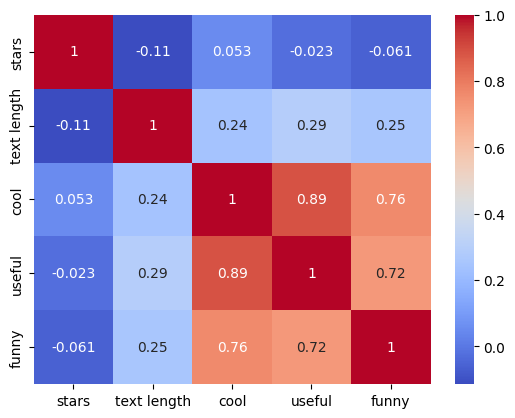

In [10]:
# visualize the dataset using correlation
df_class.corr()

# visualize the correlation
sns.heatmap(df_class.corr(), annot=True, cmap='coolwarm')

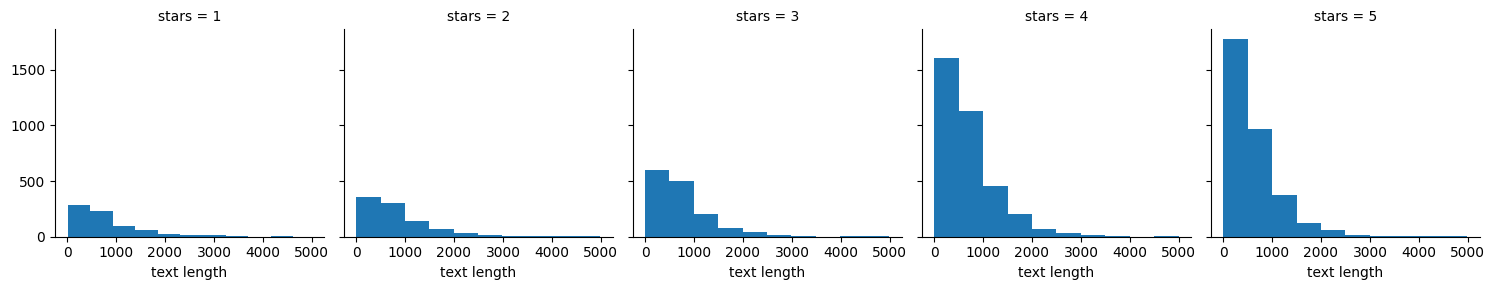

In [11]:
# data visualization - create a grid of 5 histograms of text length based off of the star ratings
g = sns.FacetGrid(df, col='stars')
g.map(plt.hist, 'text length')


<Axes: xlabel='stars', ylabel='text length'>

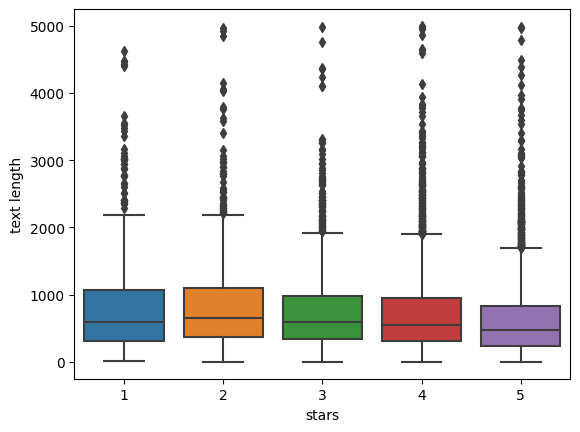

In [12]:
# data visualization - create a boxplot of text length for each star category
sns.boxplot(x='stars', y='text length', data=df)


<Axes: xlabel='stars', ylabel='count'>

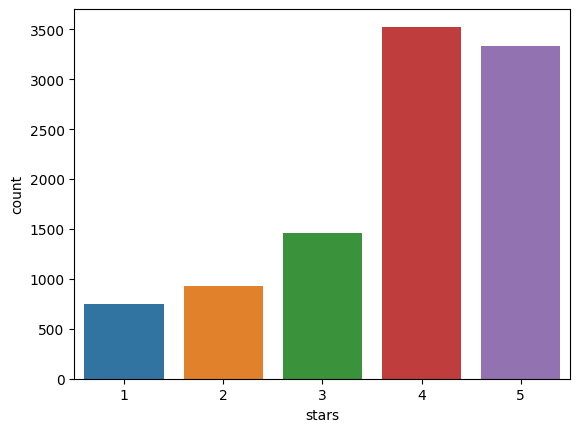

In [13]:
# data visualization - create a countplot of the number of occurrences for each type of star rating
sns.countplot(x='stars', data=df)


(-0.5, 399.5, 199.5, -0.5)

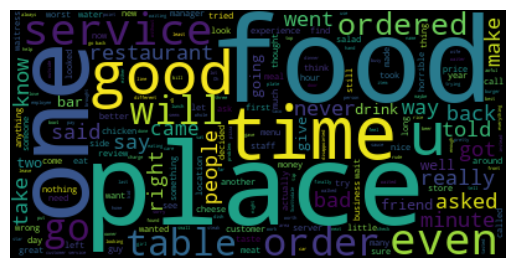

In [14]:
# word cloud for the 1-star reviews
one_star = df[df['stars'] == 1]

one_star_text = ' '.join(one_star['text'])

from wordcloud import WordCloud
one_star_cloud = WordCloud().generate(one_star_text)
plt.imshow(one_star_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

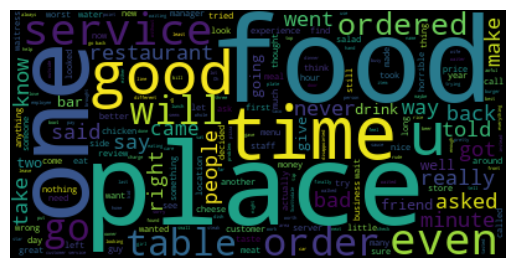

In [15]:
# word cloud for the 5-star reviews
five_star = df[df['stars'] == 5]

five_star_text = ' '.join(five_star['text'])

from wordcloud import WordCloud
five_star_cloud = WordCloud().generate(five_star_text)
plt.imshow(one_star_cloud, interpolation='bilinear')
plt.axis('off')

## Data preprocessing

In [16]:
df['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [17]:
# remove 2000 reviews from the 5 star category only
# df_2 = df[df['stars']==5].sample(n=1000, random_state=101)
# df_3 = df[df['stars']==3].sample(n=1000, random_state=101)

# remove 2 and 4 star reviews
df = pd.concat([df[df['stars']==5], df[df['stars']==3], df[df['stars']==1]])
df['stars'].value_counts()

stars
5    3337
3    1461
1     749
Name: count, dtype: int64

In [18]:
# create a new dataframe with only the text and stars columns
df = df[['text', 'stars']]
df.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
6,Drop what you're doing and drive here. After I...,5


In [28]:
# data preprocessing - remove punctuation and stopwords
import string
import nltk

nltk.download('stopwords')

def text_process(text):
    # remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    from nltk.corpus import stopwords
    
    # stem the words
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# data preprocessing - apply the text_process function to the text column
df['text'].head(5).apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bethanycheum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [wife, took, birthday, breakfast, excel, weath...
1    [idea, peopl, give, bad, review, place, goe, s...
3    [rosi, dakota, love, chaparr, dog, park, conve...
4    [gener, manag, scott, petello, good, egg, go, ...
6    [drop, your, drive, ate, go, back, next, day, ...
Name: text, dtype: object

In [29]:
# implementing word2vec - import the necessary libraries
import nltk

from gensim.models import Word2Vec
nltk.download('punkt')

# tokenize the text
tokenized_text = [nltk.word_tokenize(text) for text in df['text']]

# train the Word2Vec model
model = Word2Vec(tokenized_text)

# get the vector representation of a word
vector = model.wv['good']

# find the most similar words to a given word
similar_words = model.wv.most_similar('good')

similar_words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bethanycheum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('decent', 0.8244814872741699),
 ('great', 0.7793319225311279),
 ('amazing', 0.7377673983573914),
 ('fast', 0.7273468375205994),
 ('awesome', 0.7181167006492615),
 ('delicious', 0.7168558835983276),
 ('fantastic', 0.7165952324867249),
 ('bad', 0.7081581354141235),
 ('okay', 0.7061425447463989),
 ('wonderful', 0.7061274647712708)]

In [21]:
# export the model
model.wv.save_word2vec_format('word2vec.txt', binary=False)

# Training our Model

In [23]:
# divide the data into features and labels
X = df['text']
y = df['stars']

In [24]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
# import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
tfidf = TfidfTransformer()
# w2v_transformer = Word2VecTransformer(model_path='word2vec.txt')
nb = MultinomialNB()

from sklearn.pipeline import Pipeline

# create a pipeline
pipe = Pipeline([('vectorizer', vectorizer), ('tfidf', tfidf), ('nb', nb)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
predictions = pipe.predict(X_test)

# model accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.6113914924297044


# Ensemble Methods

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [33]:
from sklearn.model_selection import GridSearchCV

# create a pipeline with the best hyperparameters found by grid search
pipe = Pipeline([('vectorizer', vectorizer), ('tfidf', tfidf), ('rf', rf)])

# define the hyperparameters to search over
parameters = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10]
}

# perform grid search
grid_search = GridSearchCV(pipe, parameters, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

# predict the labels of the test set
y_pred = grid_search.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7368421052631579


In [34]:
# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200, 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 1)}
Best score:  0.7158653846153846


In [54]:
# define the hyperparameters to search over
parameters = {
    'vectorizer__max_features': [1000],
    'vectorizer__ngram_range': [(1, 1)],
    'rf__n_estimators': [200],
    'rf__max_depth': [None],
    'rf__min_samples_split': [2]
}

pipe = Pipeline([('vectorizer', vectorizer), ('tfidf', tfidf), ('rf', rf)])

# perform grid search
grid_search = GridSearchCV(pipe, parameters, cv=5)
grid_search.fit(X_train, y_train)

# predict the labels of the test set
pred = grid_search.predict(X_test)

# print the accuracy score
print(accuracy_score(y_test, pred))

0.7368421052631579


# Hyperparamete Tuning using Grid Search

In [38]:
nb = MultinomialNB()

# define the hyperparameters to search over
parameters = {
    'vectorizer__max_features': [1000, 5000, 10000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.1, 1, 10],
    'nb__fit_prior': [True, False]
}

pipe_nb = Pipeline([('vectorizer', vectorizer), ('tfidf', tfidf), ('nb', nb)])

# perform grid search
grid_search = GridSearchCV(pipe, parameters, cv=5)
grid_search.fit(X_train, y_train)

# predict the labels of the test set
pred = grid_search.predict(X_test)


In [39]:
# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'nb__alpha': 1, 'nb__fit_prior': False, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}
Best score:  0.7925480769230769


In [56]:
# define the hyperparameters to search over
parameters = {
    'vectorizer__max_features': [5000],
    'vectorizer__ngram_range': [(1, 2)],
    'nb__alpha': [1],
    'nb__fit_prior': [False]
}

# perform grid search
grid_search = GridSearchCV(pipe_nb, parameters, cv=5)
grid_search.fit(X_train, y_train)

# predict the labels of the test set
pred = grid_search.predict(X_test)

# print the accuracy score
print(accuracy_score(y_test, pred))

0.8031723143475126


# Model Evaluation

In [48]:
# evaluate the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))


[[115  50  19]
 [ 19 256  80]
 [ 19  86 743]]


In [49]:
# print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.75      0.62      0.68       184
           3       0.65      0.72      0.69       355
           5       0.88      0.88      0.88       848

    accuracy                           0.80      1387
   macro avg       0.76      0.74      0.75      1387
weighted avg       0.81      0.80      0.80      1387



In [50]:
# print the accuracy score
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))


0.8031723143475126


# Model Deployment

In [51]:
# predict the star rating for a new review
review =  "I highly recommend this hotel to anyone visiting the area. The service was exceptional, the rooms were spacious and well-appointed, and the location was convenient for all of our activities."

predicted_sentiment = grid_search.predict([review])

print (f'This is a {predicted_sentiment} star review.')


This is a [5] star review.


In [52]:
# export model
import pickle

with open('yelp_model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

# export vectorizer
with open('yelp_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# export tfidf transformer
with open('yelp_tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [53]:
# test model
import pickle

with open('yelp_model.pkl', 'rb') as f:
    model = pickle.load(f)

review =  "I highly recommend this hotel to anyone visiting the area. The service was exceptional, the rooms were spacious and well-appointed, and the location was convenient for all of our activities."

predicted_sentiment = model.predict([review])

print (f'This is a {predicted_sentiment} star review.')

This is a [5] star review.
